In [1]:
import io
import struct

In [7]:
import numpy as np

In [19]:
with open('data/2011-08-23_Exp000_Rec112_Cam1-Blue.dat', 'rb') as file:
    print(file.read(1).decode())
    print(struct.unpack("I", file.read(4)))
    
    span_T = struct.unpack("I", file.read(4))[0]
    span_X = struct.unpack("I", file.read(4))[0]
    span_Y = struct.unpack("I", file.read(4))[0]
    
    file.read(8)
    struct.unpack("I", file.read(4))[0] / 100
    
    # date
    print(file.read(24).decode().rstrip('\x00'))
    # additional information? -- 'DFT square 90V'
    print(file.read(971).decode().rstrip('\x00'))

    f = np.frombuffer(file.read(), dtype='uint16')

f
(439041101,)
2011-08-23 12:59:23:890



In [41]:
f.reshape(span_T, -1)[:, :-4]

array([[3635, 3805, 3984, ..., 2179, 2172, 2175],
       [3614, 3798, 3968, ..., 2179, 2167, 2175],
       [3605, 3811, 3964, ..., 2170, 2177, 2186],
       ...,
       [3624, 3797, 3935, ..., 2173, 2175, 2171],
       [3604, 3797, 3934, ..., 2174, 2169, 2172],
       [3651, 3809, 3975, ..., 2175, 2175, 2178]], dtype=uint16)

In [22]:
span_X * span_Y + 4

16388

In [27]:

span_X * span_Y

16384

In [18]:
f.shape[0] / 16388

4657.0

In [41]:
!python cascade_parser.py "2012-02-13_Exp000_Rec005_Cam3-Blue.dat"

In [40]:
from cascade_parser import cascade_import

In [29]:
with open('2012-02-13_Exp000_Rec005_Cam3-Blue.dat', 'rb') as f:
    file = io.BytesIO(f.read())

file.read(1)
struct.unpack("I", file.read(4))

span_T = struct.unpack("I", file.read(4))[0]
span_X = struct.unpack("I", file.read(4))[0]
span_Y = struct.unpack("I", file.read(4))[0]

file.read(8)
struct.unpack("I", file.read(4))[0] / 100

# date
file.read(24).decode().rstrip('\x00')
# additional information? -- 'DFT square 90V'
file.read(971).decode().rstrip('\x00')

'DFT square 90V'

In [42]:
with open('2012-02-13_Exp000_Rec005_Cam3-Blue', 'rb') as f:
    file = f.read()

In [48]:
raw_file = struct.unpack('H'*(len(file)// 2), file)

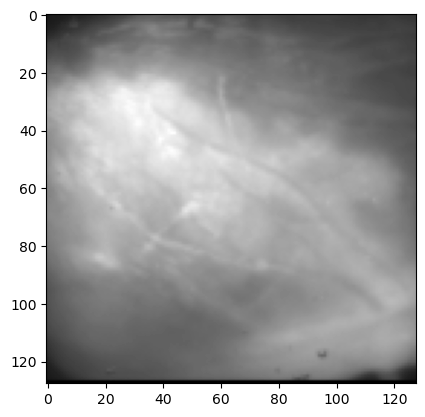

In [57]:
plt.imshow(np.array(raw_file)[128*128*10:128*128*11].reshape((128, 128)), cmap='gray')

In [28]:
with open('2012-02-13_Exp000_Rec005_Cam3-Blue.dat', 'rb') as f:
    file = io.BytesIO(f.read())

In [29]:
bstream = file.read()
len_file = len(bstream)

In [30]:
raw_image_data = list(struct.unpack('H'*(len_file//2), bstream))

In [31]:
with open('2012-02-13_Exp000_Rec005_Cam3-Blue.dat', 'rb') as f:
    g = f.read()

In [93]:
g[:17]

b'fM<+\x1a\x88\x13\x00\x00\x80\x00\x00\x00\x80\x00\x00\x00'

In [102]:
struct.unpack("I", g[13:17])

(128,)

In [32]:
# Extract whole image sequence
skip = 4
imarray = []
for t in range(span_T):
    position = t * (span_X * span_Y + skip)
    imarray.append(raw_image_data[position: position + span_X * span_Y])

In [52]:
from matplotlib import pyplot as plt

In [51]:
import numpy as np

In [44]:
imarray = np.array(imarray)

In [45]:
im = imarray[2000].reshape(span_X, span_Y)

In [64]:
# 5000 frames of 16384 pixels (128x128)
imarray.shape

(5000, 16384)

In [64]:
imarray= list(struct.unpack('>'+'H'*(len(d)//2), d))

In [65]:
import numpy as np
imarray = np.array(imarray).reshape((5000, 128, 128))

In [ ]:
imarra

In [47]:
with open('test_img.bin', 'rb') as j:
    d = j.read()

In [50]:
len(d)

163840000

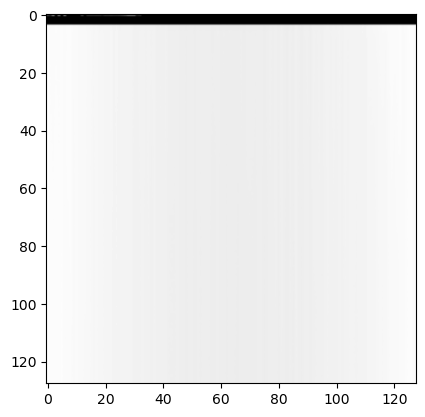

In [72]:
plt.imshow(imarray[0], cmap='gray')

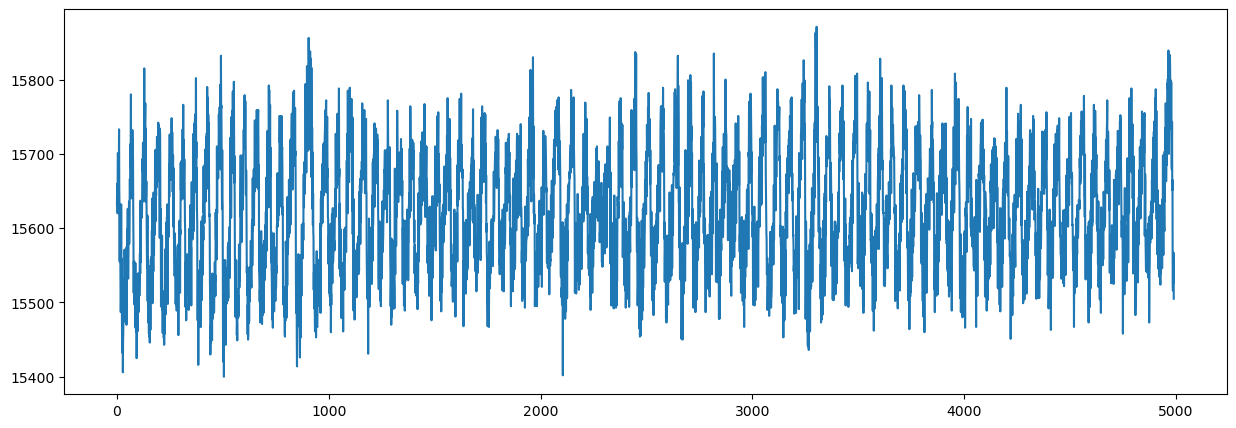

In [60]:
plt.figure(figsize=(15, 5))
plt.plot(imarray[10:, 10000])

In [185]:
span_Y[0] * span_X[0] * span_T[0] + 4 * 5000

81940000

In [93]:
framerate = struct.unpack("I", file.read(4))

In [97]:
framerate[0] / 100

8420844.02

In [75]:
with open('2012-02-13_Exp000_Rec005_Cam3-Blue.dat', 'rb') as f:
    g = f.read()

file

In [80]:
g[0:100]

b'fM<+\x1a\x88\x13\x00\x00\x80\x00\x00\x00\x80\x00\x00\x00\x01\x00\x00\x00\x01\x00\x00\x00F\xc3\x00\x002012-02-13 15:40:11:328\x00DFT square 90V\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

In [84]:
# struct.unpack("", file.read(150))

data = open("2012-02-13_Exp000_Rec005_Cam3-Blue.dat", "rb").read()

struct.unpack("", data)

error: unpack requires a buffer of 0 bytes